In [1]:
import os

import numpy as np
from pandas.io.parsers import read_csv
from sklearn.utils import shuffle
from matplotlib import pyplot
from time import sleep

In [2]:
FTRAIN = '/home/antreas/Desktop/keypoint/Data/kaggle_Data/training.csv'
FTEST = '/home/antreas/Desktop/keypoint/Data/kaggle_Data/test.csv'

def load(test=False, cols=None):

    fname = FTEST if test else FTRAIN
    df = read_csv(os.path.expanduser(fname)) #

    df['Image'] = df['Image'].apply(lambda im: np.fromstring(im, sep=' '))

    if cols: 
        df = df[list(cols) + ['Image']]

    print(df.count())  
    df = df.dropna()   #samples with no keypoint value are discarde

    X = np.vstack(df['Image'].values) / 255.  #normalize the images
    X = X.astype(np.float32)

    if not test:  
        y = df[df.columns[:-1]].values
        y = (y - 48) / 48  
        X, y = shuffle(X, y, random_state=42)  
        y = y.astype(np.float32)
    else:
        y = None

    return X, y

X, y = load()
print("X.shape == {}; X.min == {:.3f}; X.max == {:.3f}".format(
    X.shape, X.min(), X.max()))
print("y.shape == {}; y.min == {:.3f}; y.max == {:.3f}".format(
    y.shape, y.min(), y.max()))

left_eye_center_x            7039
left_eye_center_y            7039
right_eye_center_x           7036
right_eye_center_y           7036
left_eye_inner_corner_x      2271
left_eye_inner_corner_y      2271
left_eye_outer_corner_x      2267
left_eye_outer_corner_y      2267
right_eye_inner_corner_x     2268
right_eye_inner_corner_y     2268
right_eye_outer_corner_x     2268
right_eye_outer_corner_y     2268
left_eyebrow_inner_end_x     2270
left_eyebrow_inner_end_y     2270
left_eyebrow_outer_end_x     2225
left_eyebrow_outer_end_y     2225
right_eyebrow_inner_end_x    2270
right_eyebrow_inner_end_y    2270
right_eyebrow_outer_end_x    2236
right_eyebrow_outer_end_y    2236
nose_tip_x                   7049
nose_tip_y                   7049
mouth_left_corner_x          2269
mouth_left_corner_y          2269
mouth_right_corner_x         2270
mouth_right_corner_y         2270
mouth_center_top_lip_x       2275
mouth_center_top_lip_y       2275
mouth_center_bottom_lip_x    7016
mouth_center_b

In [3]:
def plot_sample(X,y,axs):
   
    
    axs.imshow(X.reshape(96,96),cmap="gray")
    axs.scatter(48*y[0::2]+ 48,48*y[1::2]+ 48 , marker='.' , edgecolors='lawngreen')
    
def plot_loss(hist,name,plt,RMSE_TF=False):
    loss = hist['loss']
    val_loss = hist['val_loss']
    if RMSE_TF:
        loss = np.sqrt(np.array(loss))*48 
        val_loss = np.sqrt(np.array(val_loss))*48 
        
    plt.plot(loss,"--",linewidth=3,label="train:"+name)
    plt.plot(val_loss,linewidth=3,label="val:"+name)

In [4]:
def load2d(test=False,cols=None):

    re = load(test, cols)
    
    X = re[0].reshape(-1,96,96,1)
    y = re[1]

    return X, y

#load for (96,96,1) images

In [5]:
X, y = load2d()

left_eye_center_x            7039
left_eye_center_y            7039
right_eye_center_x           7036
right_eye_center_y           7036
left_eye_inner_corner_x      2271
left_eye_inner_corner_y      2271
left_eye_outer_corner_x      2267
left_eye_outer_corner_y      2267
right_eye_inner_corner_x     2268
right_eye_inner_corner_y     2268
right_eye_outer_corner_x     2268
right_eye_outer_corner_y     2268
left_eyebrow_inner_end_x     2270
left_eyebrow_inner_end_y     2270
left_eyebrow_outer_end_x     2225
left_eyebrow_outer_end_y     2225
right_eyebrow_inner_end_x    2270
right_eyebrow_inner_end_y    2270
right_eyebrow_outer_end_x    2236
right_eyebrow_outer_end_y    2236
nose_tip_x                   7049
nose_tip_y                   7049
mouth_left_corner_x          2269
mouth_left_corner_y          2269
mouth_right_corner_x         2270
mouth_right_corner_y         2270
mouth_center_top_lip_x       2275
mouth_center_top_lip_y       2275
mouth_center_bottom_lip_x    7016
mouth_center_b

In [6]:
y[1]

array([ 0.4330242 , -0.21624877, -0.3466828 , -0.3463223 ,  0.25858903,
       -0.1851669 ,  0.5810062 , -0.1878271 , -0.16970447, -0.23996718,
       -0.5165956 , -0.3564843 ,  0.29375893, -0.24669313,  0.74820185,
       -0.32774875, -0.07298451, -0.2971868 , -0.6224353 , -0.51643556,
       -0.0278047 ,  0.24908654,  0.334971  ,  0.3931978 , -0.4643302 ,
        0.31000873, -0.06167792,  0.52398473, -0.08612007,  0.5925943 ],
      dtype=float32)

In [7]:
# def load2d(test=False, cols=None):
#     X, y = load(test, cols)
#     X = X.reshape(-1, 1, 96, 96)
#     return X, y

# #load for (1,96,96) images

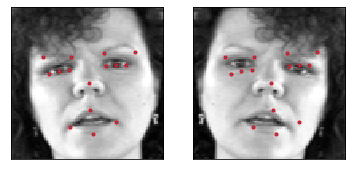

In [40]:
X_flipped = X[:, :, ::-1, :]

#for (96,96,1) images

# X_flipped=X[:, :, :, ::-1]

# #for (1,96,96) images
fig = pyplot.figure(figsize=(6, 3))
ax = fig.add_subplot(1, 2, 1, xticks=[], yticks=[])
plot_sample(X[10], y[10], ax)
ax = fig.add_subplot(1, 2, 2, xticks=[], yticks=[])
plot_sample(X_flipped[10], y[10], ax)
pyplot.show()




In [13]:
# In the reversed image, the keypoint position is misaligned.
#You can see that you need to change the keypoint position as well as flip the image. How should I change it

# left_eye_center_x and right_eye_center_x need to be swapped, but nose_tip_y does not need to be changed.
#Here try to reverse the keypoint using the array element number.

In [14]:
flip_indices = [
    (0, 2), (1, 3),
    (4, 8), (5, 9), (6, 10), (7, 11),
    (12, 16), (13, 17), (14, 18), (15, 19),
    (22, 24), (23, 25),
    ]

df = read_csv(os.path.expanduser(FTRAIN))
for i, j in flip_indices:
    print("{} -> {}".format(df.columns[i], df.columns[j]))

left_eye_center_x -> right_eye_center_x
left_eye_center_y -> right_eye_center_y
left_eye_inner_corner_x -> right_eye_inner_corner_x
left_eye_inner_corner_y -> right_eye_inner_corner_y
left_eye_outer_corner_x -> right_eye_outer_corner_x
left_eye_outer_corner_y -> right_eye_outer_corner_y
left_eyebrow_inner_end_x -> right_eyebrow_inner_end_x
left_eyebrow_inner_end_y -> right_eyebrow_inner_end_y
left_eyebrow_outer_end_x -> right_eyebrow_outer_end_x
left_eyebrow_outer_end_y -> right_eyebrow_outer_end_y
mouth_left_corner_x -> mouth_right_corner_x
mouth_left_corner_y -> mouth_right_corner_y


In [8]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.utils import shuffle

from keras.preprocessing.image import ImageDataGenerator

In [9]:
from keras.backend.tensorflow_backend import set_session
config = tf.ConfigProto()
config.gpu_options.allow_growth = True 
config.log_device_placement = True 
sess = tf.Session(config=config)
set_session(sess)

In [10]:
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)


In [9]:
keras.preprocessing.image.ImageDataGenerator(featurewise_center=False,
    samplewise_center=False,
    featurewise_std_normalization=False,
    samplewise_std_normalization=False,
    zca_whitening=False,
    rotation_range=0.,
    width_shift_range=0.,
    height_shift_range=0.,
    shear_range=0.,
    zoom_range=0.,
    channel_shift_range=0.,
    fill_mode='nearest',
    cval=0.,
    horizontal_flip=False,
    vertical_flip=False,)

In [24]:
class FlippedImageDataGenerator(ImageDataGenerator):
    flip_indices = [
        (0, 2), (1, 3),
        (4, 8), (5, 9), (6, 10), (7, 11),
        (12, 16), (13, 17), (14, 18), (15, 19),
        (22, 24), (23, 25),
        ]

    def next(self):
        X_batch, y_batch = super(FlippedImageDataGenerator, self).next()
        batch_size = X_batch.shape[0]
        indices = np.random.choice(batch_size, batch_size/2, replace=False)
        X_batch[indices] = X_batch[indices, :, ::-1, :]
        #for (1,96,96) images X_batch[indices, :, :, ::-1]

        if y_batch is not None:
            y_batch[indices, ::2] = y_batch[indices, ::2] * -1

            # left_eye_center_x -> right_eye_center_x 
            for a, b in self.flip_indices:
                y_batch[indices, a], y_batch[indices, b] = (
                    y_batch[indices, b], y_batch[indices, a]
                )

        return X_batch, y_batch

In [25]:
X_val.shape

(428, 96, 96, 1)

In [26]:
y_val[1]

array([ 0.37624 , -0.23232 , -0.44606 , -0.21444 ,  0.2511  , -0.21444 ,
        0.51032 , -0.21444 , -0.32988 , -0.21444 , -0.58908 , -0.19656 ,
        0.15278 , -0.393198,  0.64438 , -0.402136, -0.27624 , -0.366382,
       -0.70528 , -0.38426 , -0.05278 ,  0.11628 ,  0.33156 ,  0.61682 ,
       -0.35668 ,  0.62576 , -0.04386 ,  0.50062 , -0.01704 ,  0.79558 ],
      dtype=float32)

In [27]:
def conv(input, kernel, filt, stride):
    x = layers.Conv2D(filters=filt, kernel_size=kernel, strides=stride)(input)
    return x

def resblock(input, filters):
    x = conv(input, 1, filters, 1)
    x = layers.BatchNormalization(axis=-1, fused=True)(x)
    x = layers.LeakyReLU(alpha=0.2)(x)  
    x = conv(x, 3, filters, 2)
    x = layers.BatchNormalization(axis=-1, fused=True)(x)
    x = layers.LeakyReLU(alpha=0.2)(x)  
    x = conv(x, 1, filters, 1)
    x = layers.BatchNormalization(axis=-1, fused=True)(x)
#     x = layers.LeakyReLU(alpha=0.2)(x)
    short = conv(input, 3, filters, 2)
    short = layers.BatchNormalization(axis=-1 , fused=True)(short)
    x = layers.Add()([x, short])
    x = layers.LeakyReLU(alpha=0.2)(x)   
    return x

def conv_down(input, filters):
    x = conv(input, 3, filters, 2)
    x = layers.BatchNormalization(axis=-1, fused=True)(x)
    x = layers.LeakyReLU(alpha=0.2)(x)  
    return x


In [28]:
def create_model():
    Input = layers.Input(shape=(96, 96, 1))
    x = resblock(Input, 32)
    x = resblock(x, 128)
    x = resblock(x, 128)
    x = conv_down(x,128)
    
    
    
    x = layers.Flatten()(x)
    x = layers.Dense(512)(x)
    x = layers.LeakyReLU(alpha=0.2)(x)
    x = layers.Dense(30)(x)
    
    model = tf.keras.Model(inputs=Input, outputs=x)
    model.compile(optimizer=keras.optimizers.Adam(0.001), 
              loss='mean_squared_error',
              metrics=['mse' , 'accuracy'])
    return model

# def rmse(x, y):
#     x = tf.math.sqrt(tf.keras.losses.MSE(x,y))
#     return x 

model=create_model()
model.summary()

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 96, 96, 1)]  0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 96, 96, 32)   64          input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization (BatchNorma (None, 96, 96, 32)   128         conv2d[0][0]                     
__________________________________________________________________________________________________
leaky_re_lu (LeakyReLU)         (None, 96, 96, 32)   0           batch_normalization[0][0]        
_____________

In [29]:
%%time

flipgen = FlippedImageDataGenerator()

hist = model.fit_generator(flipgen.flow(X_train, y_train),
                              steps_per_epoch=X_train.shape[0],
                             epochs=50,
                             validation_data=(X_val, y_val))

Epoch 1/50
1712/1712 [==============================] - 70s 41ms/step - loss: 0.0102 - mean_squared_error: 0.0101 - acc: 0.7125 - val_loss: 0.0027 - val_mean_squared_error: 0.0027 - val_acc: 0.7407
Epoch 2/50
1712/1712 [==============================] - 66s 39ms/step - loss: 0.0014 - mean_squared_error: 0.0014 - acc: 0.8108 - val_loss: 0.0027 - val_mean_squared_error: 0.0027 - val_acc: 0.7336
Epoch 3/50
1712/1712 [==============================] - 66s 39ms/step - loss: 0.0011 - mean_squared_error: 0.0011 - acc: 0.8375 - val_loss: 0.0022 - val_mean_squared_error: 0.0022 - val_acc: 0.7687
Epoch 4/50
1712/1712 [==============================] - 66s 39ms/step - loss: 6.5357e-04 - mean_squared_error: 6.5307e-04 - acc: 0.8633 - val_loss: 0.0013 - val_mean_squared_error: 0.0013 - val_acc: 0.7687
Epoch 5/50
1712/1712 [==============================] - 66s 39ms/step - loss: 5.4323e-04 - mean_squared_error: 5.4332e-04 - acc: 0.8836 - val_loss: 0.0011 - val_mean_squared_error: 0.0012 - val_acc: 0

Epoch 49/50
1712/1712 [==============================] - 66s 39ms/step - loss: 5.4192e-06 - mean_squared_error: 5.4155e-06 - acc: 0.9871 - val_loss: 8.5702e-04 - val_mean_squared_error: 8.6775e-04 - val_acc: 0.8154
Epoch 50/50
1712/1712 [==============================] - 66s 39ms/step - loss: 5.1326e-06 - mean_squared_error: 5.1195e-06 - acc: 0.9871 - val_loss: 8.5692e-04 - val_mean_squared_error: 8.6808e-04 - val_acc: 0.8084
CPU times: user 39min 1s, sys: 6min 29s, total: 45min 31s
Wall time: 55min 24s


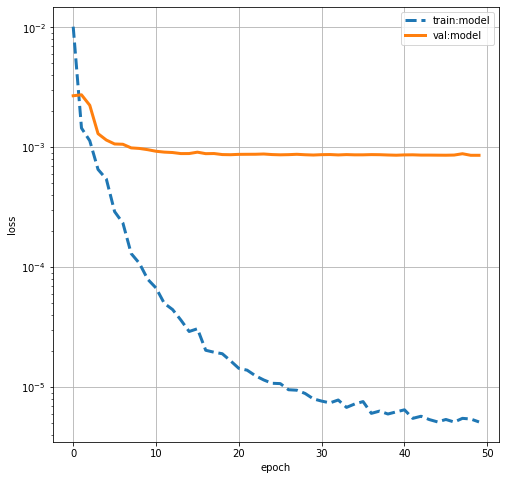

In [30]:
pyplot.figure(figsize=(8,8))
plot_loss(hist.history,"model",pyplot)
pyplot.legend()
pyplot.grid()
pyplot.yscale("log")
pyplot.xlabel("epoch")
pyplot.ylabel("loss")
pyplot.show()

In [24]:
model.save('/home/antreas/Desktop/keypointmodel/my_chinese_model_new_resnet.h5')

In [6]:
import numpy as np
import cv2
from matplotlib import pyplot as plt
%matplotlib inline
from tensorflow import keras
import tensorflow as tf

ImageId    1783
Image      1783
dtype: int64


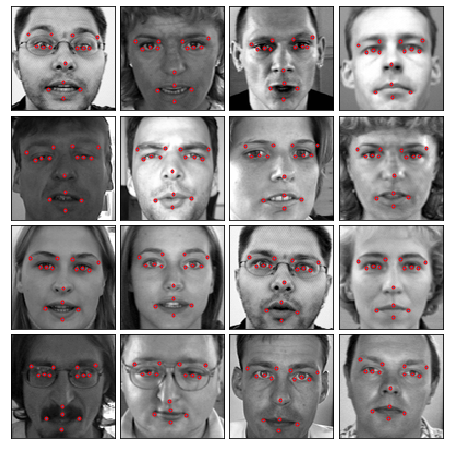

In [31]:
X_test, _ = load2d(test=True)
y_test = model.predict(X_test)

fig = pyplot.figure(figsize=(6, 6))
fig.subplots_adjust(
    left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.05)

for i in range(16):
    axis = fig.add_subplot(4, 4, i+1, xticks=[], yticks=[])
    plot_sample(X_test[i], y_test[i], axis)

pyplot.show()


In [37]:
X_train.shape[0]

1712

In [ ]:
#print model

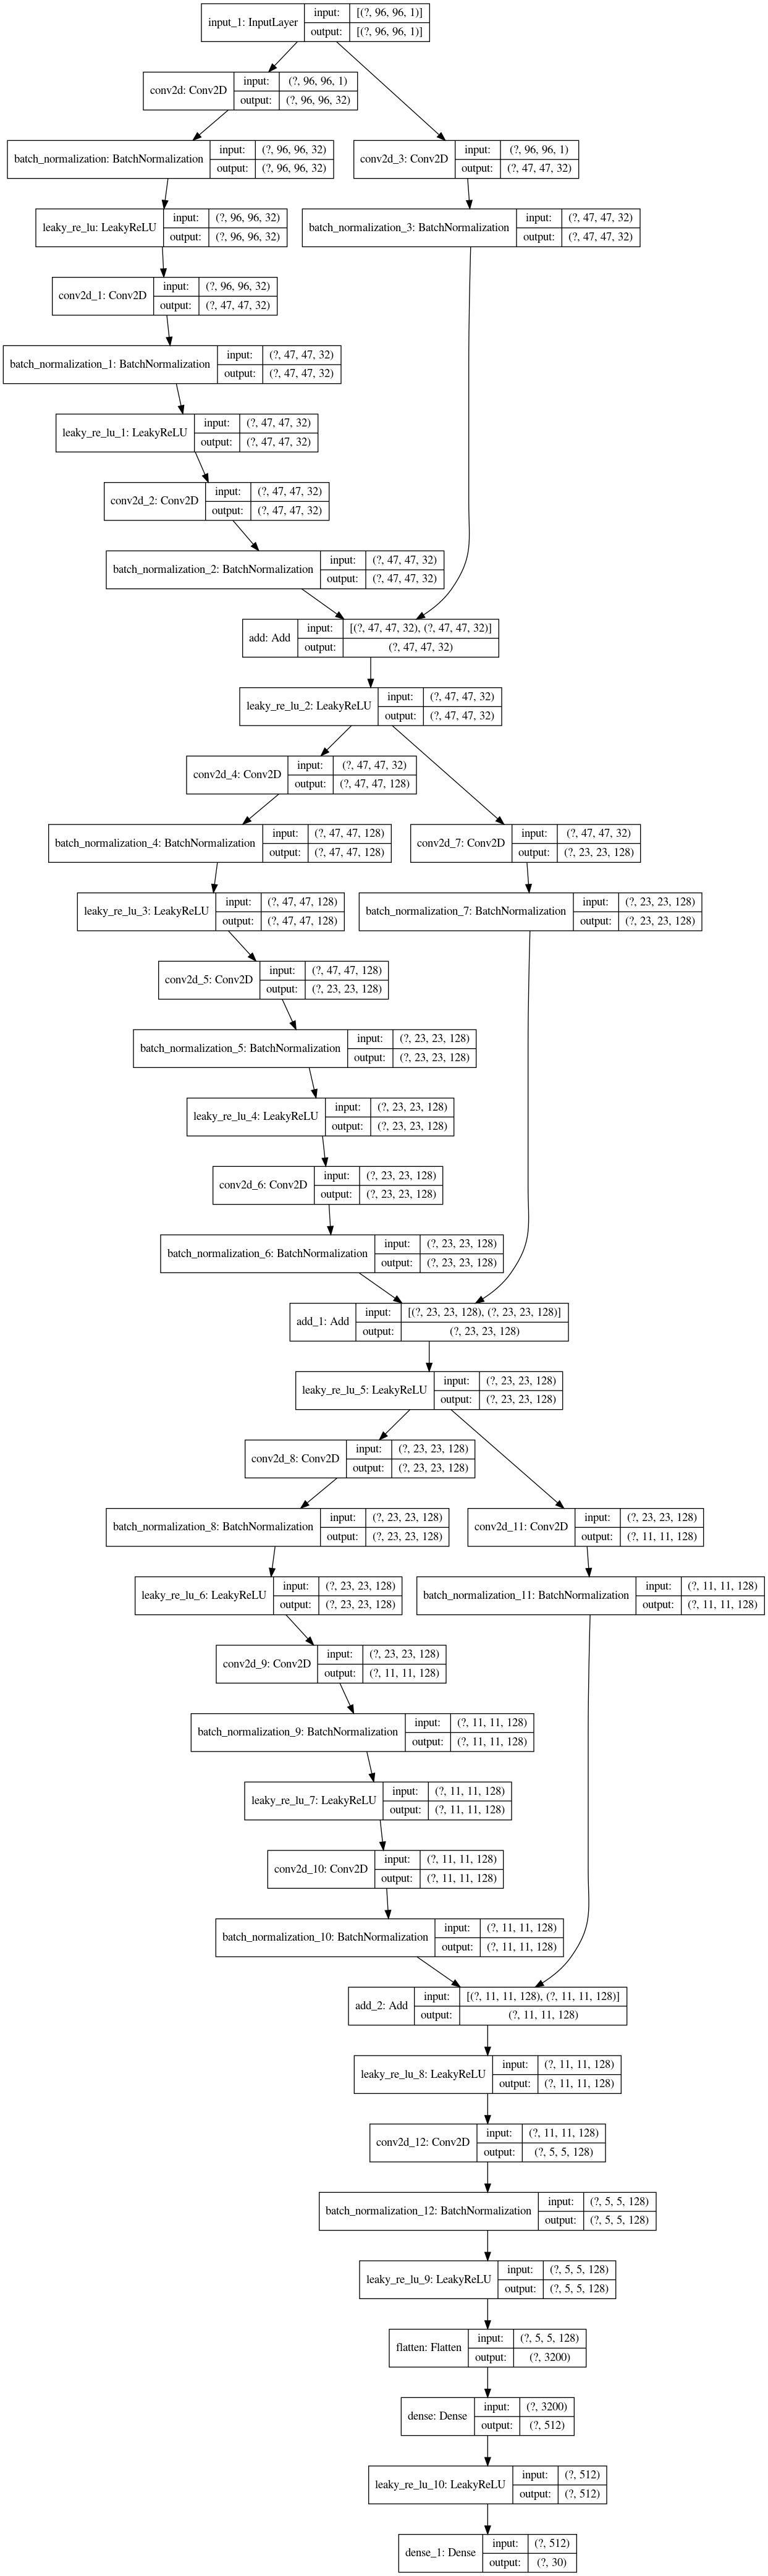

In [32]:
tf.keras.utils.plot_model(model, to_file='/home/antreas/Desktop/model_res_plot.png' , show_shapes= True , show_layer_names=True )